# Book Crossing
[Book Crossing](http://www2.informatik.uni-freiburg.de/~cziegler/BX/) Dataset was collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. 

The dataset used here is ***Preprocessed_data.csv*** from [Kaggle](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset) which included features: Category, Language, Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

import functions as f

In [6]:
usecols = ['user_id', 'age', 'isbn', 'rating', 'book_title', 'book_author','img_m', 'Summary', 'year_of_publication','Category', 'Language', 'country' ]
df_ratings = pd.read_csv('./data/Preprocessed_data.csv', usecols=usecols)
print(df_ratings.shape)
df_ratings = df_ratings[df_ratings['rating'] != 0] #remove implicit rating


(1031175, 12)


In [7]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(df_ratings), len(df_ratings['isbn'].unique()), len(df_ratings['user_id'].unique())))

Number of ratings: 383852
Number of books: 149842
Number of users: 68092


## Data Preprocessing

In [8]:
def parse_list(x:str):
    lst = x.strip('][').split('\', ')
    return list(map(lambda x: x.strip('\''), lst))
            
df_ratings.drop(index=df_ratings[df_ratings['Category'] == '9'].index, inplace=True) #remove 9 in category
df_ratings['Category'] = df_ratings['Category'].apply(parse_list)
print(df_ratings.shape)
df_ratings.sample(5)

(231585, 12)


,user_id,age,isbn,rating,book_title,book_author,year_of_publication,img_m,Summary,Language,Category,country
242113,8801,24.0000,0440241073,7,The Summons,John Grisham,2002.0,http://images.amazon.com/images/P/0440241073.0...,"Ray and his brother, Forrest, receive a letter...",en,[Fiction],usa
204607,51350,34.7439,0451206711,8,Orchid Blues (Holly Barker Novels (Paperback)),Stuart Woods,2002.0,http://images.amazon.com/images/P/0451206711.0...,"On the way to her wedding, Chief of Police Hol...",en,[Fiction],NaN
898154,135265,32.0000,0373245246,6,Family Merger,Leigh Greenwood,2003.0,http://images.amazon.com/images/P/0373245246.0...,Family Merger by Leigh Greenwood released on J...,en,[Fiction],usa
312597,53726,34.7439,0552997803,5,Knowledge of Angels,Jill Paton Walsh,1998.0,http://images.amazon.com/images/P/0552997803.0...,"At once a mystery, an adventure tale, and a me...",en,[Castaways],united kingdom
24622,63044,34.7439,0786863986,3,A Monk Swimming,Malachy McCourt,1998.0,http://images.amazon.com/images/P/0786863986.0...,"This book covers the decade 1952-63, when Mala...",en,[Biography & Autobiography],usa


In [9]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d\nNumber of Language: %d\nNumber of Countries: %d' % (len(df_ratings), len(df_ratings['isbn'].unique()), len(df_ratings['user_id'].unique()), len(df_ratings['Language'].unique()), len(df_ratings['country'].unique())))

Number of ratings: 231585
Number of books: 80852
Number of users: 49363
Number of Language: 26
Number of Countries: 281


# EDA
Exploratory Data Analysis of the processed dataset. We are looking for some correlation and feature that can affect the ratings, such as book language, user age - book genres

In [63]:
books = df_ratings[['book_title', 'book_author', 'img_m', 'Summary','isbn', 'year_of_publication','Language', 'Category']].drop_duplicates(['book_title'])
books.shape

books_by_Category = books.explode("Category").groupby("Category")
# # sort by count
category_counts_sorted = books_by_Category['isbn'].count().sort_values(ascending=False)
top_categories = category_counts_sorted[:30]
top_categories.index

# books = books[books['Language'] == 'en']
# books['book_title'] = books['book_title'].apply(f.short_title)
# authors = books.groupby('book_author')['book_author'].count().sort_values(ascending=False)
# authors
# books[books['book_author'] == 'J. K. Rowling']

Index(['Fiction', 'Juvenile Fiction', 'Biography & Autobiography', 'History',
       'Religion', 'Juvenile Nonfiction', 'Social Science', 'Humor',
       'Body, Mind & Spirit', 'Business & Economics', 'Cooking',
       'Health & Fitness', 'Family & Relationships', 'Computers', 'Travel',
       'Self-Help', 'Psychology', 'Science', 'Poetry', 'Art',
       'Literary Criticism', 'Nature', 'Philosophy', 'Reference',
       'Performing Arts', 'Drama', 'Sports & Recreation', 'Political Science',
       'Comics & Graphic Novels', 'Crafts & Hobbies'],
      dtype='object', name='Category')

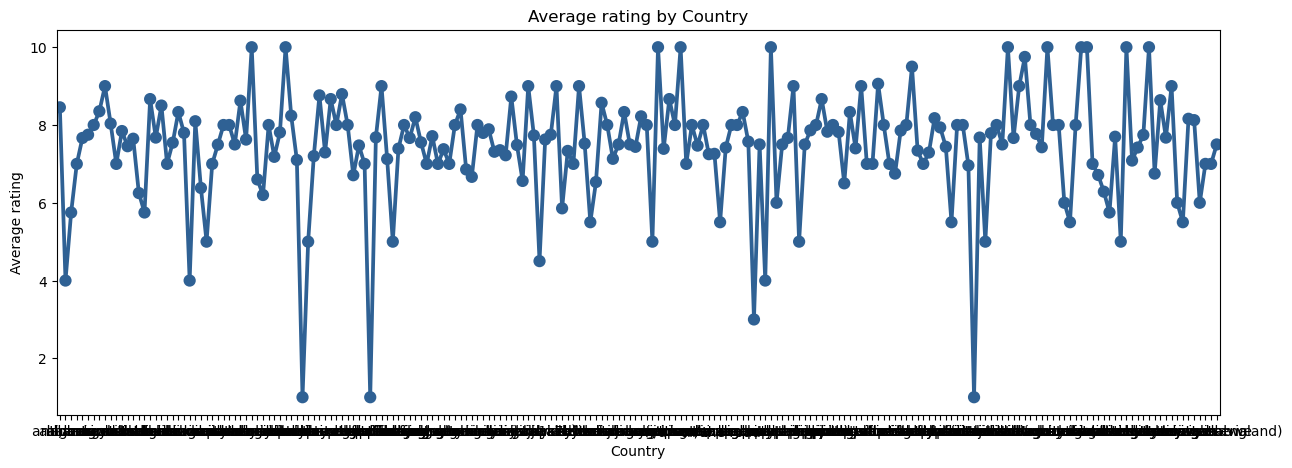

In [7]:
def parse_country(x):
    if isinstance(x,str):
        return x.split(', ')[-1]
    else:
        return 'n/a'
        
df_ratings['country'] = df_ratings['country'].apply(parse_country)
avg_rating_by_Country = df_ratings.groupby('country')['rating'].mean()

# Create the barplot
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x=avg_rating_by_Country.index, y=avg_rating_by_Country.values, color='#2f6194', ax=ax)
ax.set_title('Average rating by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Average rating')
plt.show()

In [61]:

rating_by_Category = df_ratings.explode("Category").groupby("Category")
avg_rating_by_Category = rating_by_Category['rating'].mean()
# # sort by count
category_counts_sorted = rating_by_Category['rating'].count().sort_values(ascending=False)
top_categories = category_counts_sorted[:30]
top_categories


Category
Fiction                        135429
Juvenile Fiction                15062
Biography & Autobiography        9437
Humor                            3934
History                          3354
Religion                         2981
Body, Mind & Spirit              2169
Juvenile Nonfiction              2071
Social Science                   2059
Business & Economics             1902
Family & Relationships           1811
Self-Help                        1742
Health & Fitness                 1597
Cooking                          1377
Travel                           1230
Poetry                           1069
True Crime                       1007
Psychology                       1002
Science                           974
Computers                         945
Literary Criticism                933
Drama                             896
Political Science                 862
Nature                            821
Comics & Graphic Novels           816
Philosophy                        796
Per

In [64]:
# Filter the DataFrame to only keep rows where at least one category is in the top categories
df_top_categories = df_ratings[df_ratings['Category'].apply(lambda x: any(item for item in x if item in top_categories.index))]
df_top_categories.sample(10)


,user_id,age,isbn,rating,book_title,book_author,year_of_publication,img_m,Summary,Language,Category,country
321469,7283,30.0000,0380732033,7,Night Lives On,Walter J. Lord,1998.0,http://images.amazon.com/images/P/0380732033.0...,Why did the nearby ship Californian ignore Tit...,en,[History],usa
76031,11676,34.7439,0425137945,5,Greygallows,Barbara Michaels,1993.0,http://images.amazon.com/images/P/0425137945.0...,When Lucy Cartwright follows her dashing new h...,en,[Fiction],NaN
632573,30276,49.0000,0373613709,7,The Player (Family Secrets),Evelyn Vaughn,2003.0,http://images.amazon.com/images/P/0373613709.0...,The Player by Evelyn Vaughn released on Jul 25...,en,[Fiction],usa
506131,14291,62.0000,0783884397,10,The Case of the Caretaker's Cat (G K Hall Larg...,Erle Stanley Gardner,1998.0,http://images.amazon.com/images/P/0783884397.0...,Perry Mason investigates the well-to-doLaxter ...,en,[Fiction],usa
117903,184140,35.0000,0743457358,6,Everything's Eventual : 14 Dark Tales,Stephen King,2002.0,http://images.amazon.com/images/P/0743457358.0...,King is in terrifying top form in these fourte...,en,[Fiction],canada
722271,218552,48.0000,0786806532,5,Daughters of the Moon: Goddess of the Night - ...,Lynne Ewing,2000.0,http://images.amazon.com/images/P/0786806532.0...,"Vanessa, who has always had the special power ...",en,[Juvenile Fiction],usa
351634,46312,9.0000,059067319X,10,Night in Werewolf Woods (Give Yourself Goosebu...,R. L. Stine,1996.0,http://images.amazon.com/images/P/059067319X.0...,Readers take a camping trip in the woods that ...,en,[Juvenile Fiction],usa
526773,99720,34.7439,0312022824,9,Silence of the Lambs,Thomas Harris,1999.0,http://images.amazon.com/images/P/0312022824.0...,FBI Academy trainee Clarice Starling hopes tha...,en,[Fiction],usa
811538,168245,37.0000,0380978555,10,The Pursuit (Sherring Cross (Hardcover)),Johanna Lindsey,2002.0,http://images.amazon.com/images/P/0380978555.0...,But before she begins her pursuit of a new lif...,en,[Fiction],canada
622310,182085,34.7439,0373765096,10,Cherokee Baby,Sheri Whitefeather,2003.0,http://images.amazon.com/images/P/0373765096.0...,Cherokee Baby by Sheri WhiteFeather released o...,en,[Fiction],germany


C:\Users\DELL\AppData\Local\Temp\ipykernel_6200\2784204424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories.loc[:,'age_group'] = pd.cut(df_top_categories['age'], age_groups, labels=age_labels)


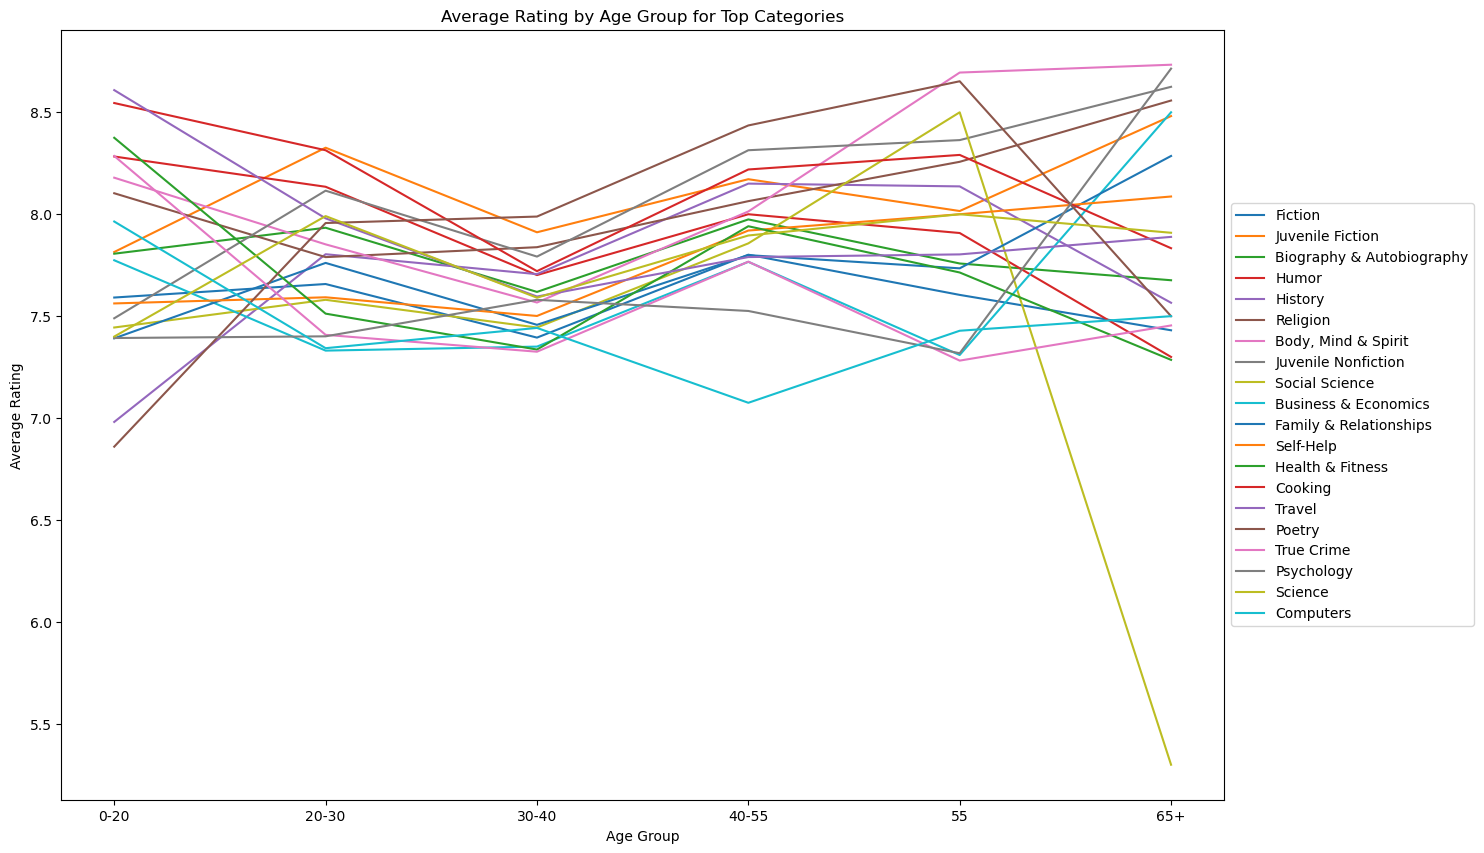

In [10]:
# Define the age groups and corresponding labels
age_groups = [0, 20, 30, 40, 55, 65,100]
age_labels = ['0-20', '20-30','30-40', '40-55', '55', '65+']
df_top_categories.loc[:,'age_group'] = pd.cut(df_top_categories['age'], age_groups, labels=age_labels)
fig, ax = plt.subplots(figsize=(15, 10))
for category in top_categories[:20].index:
# Group the ratings DataFrame by age group and calculate the mean rating
    df_avg_ratings = df_top_categories[df_top_categories['Category'].apply(lambda x: any(item for item in x if item == category))].groupby('age_group')['rating'].mean()

    # Plot the average ratings by age group for the current category
    ax.plot(df_avg_ratings.index, df_avg_ratings.values, label=category)

# Add labels and title to the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating by Age Group for Top Categories')

# Add a legend to the plot
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

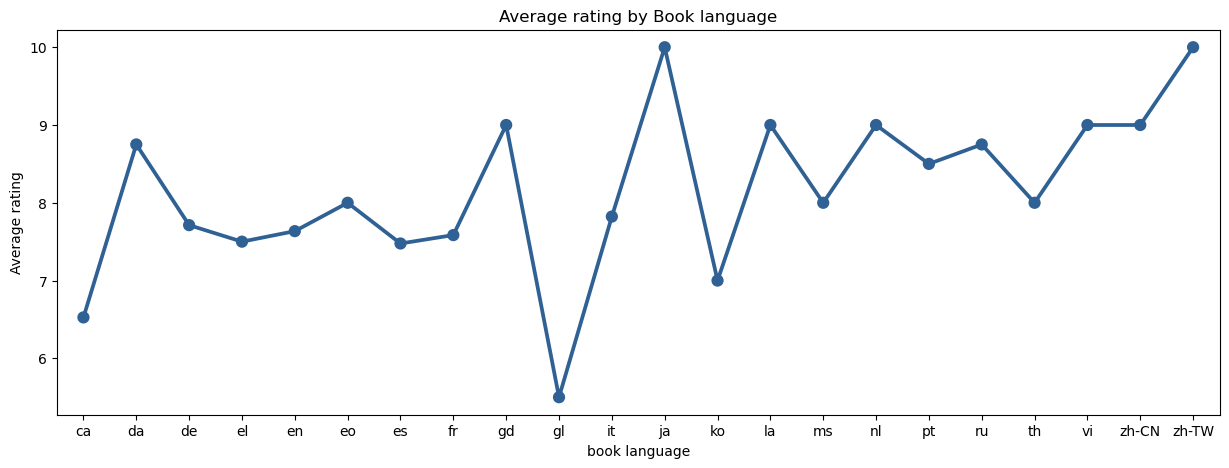

In [11]:
avg_rating_by_Language = df_top_categories.groupby('Language')['rating'].mean()

# Create the barplot
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x=avg_rating_by_Language.index, y=avg_rating_by_Language.values, color='#2f6194', ax=ax)
ax.set_title('Average rating by Book language')
ax.set_xlabel('book language')
ax.set_ylabel('Average rating')
plt.show()

In [65]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(df_ratings),
                                                                           len(df_ratings['isbn'].unique()),
                                                                           len(df_ratings['user_id'].unique())))
print('\nFor top Categories: \nNumber of ratings: %d\nNumber of books: %d\nNumber of users: %d\nNumber of countries: %d' 
                                                                            % (len(df_top_categories),
                                                                           len(df_top_categories['isbn'].unique()),
                                                                           len(df_top_categories['user_id'].unique()),
                                                                           len(df_top_categories['country'].unique())))


Number of ratings: 231585
Number of books: 80852
Number of users: 49363

For top Categories: 
Number of ratings: 198542
Number of books: 63946
Number of users: 44497
Number of countries: 265


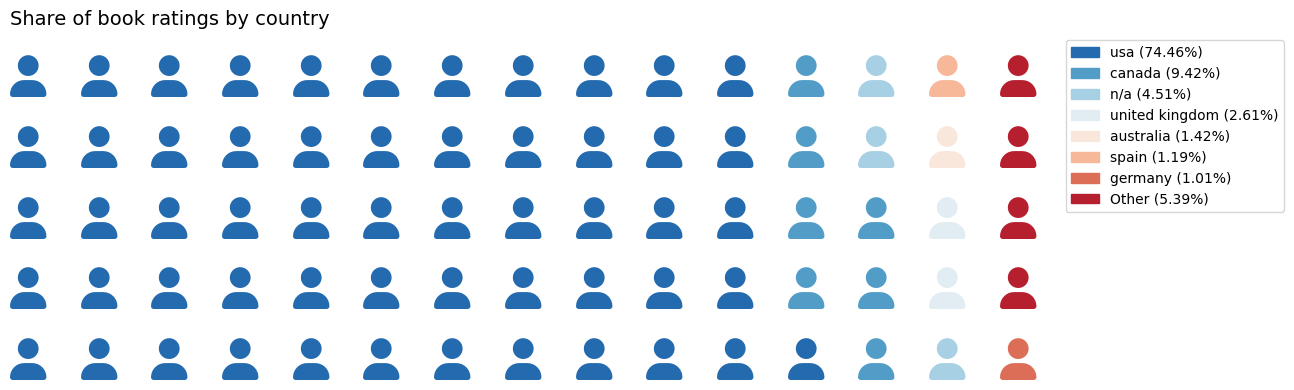

In [13]:
df_users_country = df_top_categories['country'].value_counts(normalize=True).reset_index()
df_users_country.columns = ['country', 'share']
df_users_country.loc[df_users_country['share']<0.01] = 'Other', df_users_country[df_users_country['share']<0.01]['share'].sum()
df_users_country.drop_duplicates(inplace=True)
waffle_data = df_users_country.set_index('country').T.to_dict('records')[0]

fig = plt.figure(
        FigureClass = Waffle,
        figsize = (18,4),
        rows = 5,
        columns = 15,
        values = waffle_data,
        labels = ["%s (%.2f%%)" % (k, v*100) for k, v in waffle_data.items()],
        legend = {
            'loc': 'upper left',
            'bbox_to_anchor': (1, 1)
        },
        colors = sns.color_palette("RdBu_r", len(waffle_data)).as_hex(),
        icons = 'user',
        font_size = 30,
        title = {
            'label': 'Share of book ratings by country',
            'loc': 'left',
            'fontdict': {
                'fontsize': 14
            }
        }
)

plt.show()

In [41]:
df_top_categories.to_csv('data/ratings_top_w_features.csv', encoding='utf-8', index=False)